# Clicar ou Não Clicar, eis a questão!

Este projeto consiste em analisar os dados da performance de um anúncio em rede social. O objetivo é criar um modelo que consiga predizer se um consumidor clicaria ou não no anúncio, baseado nas seguintes variáveis:

* __Daily Time Spent on Site__: Tempo de permanência no site, em minutos
* __Age__: Idade, em anos
* __Area Income__: Renda média da região do consumidor, em dólares
* __Daily Internet Usage__: Tempo de uso de internet diário, em minutos
* __Ad Topic Line__: Texto exibido no anúncio
* __City__: Cidade atual do consumidor
* __Male__: Gênero
* __Country__: País atual do consumidor
* __Timestamp__: Horário em que clicou ou fechou o anúncio
* __Clicked on Ad__: Clicou ou não no anúncio


# 1) Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set_style('whitegrid')

# 2) Obtendo os Dados

In [5]:
adv = pd.read_csv('advertising.csv')

In [6]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# 2.1) Conteúdo das Variáveis

In [7]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


* 1) Daily Time Spent on Site --> numerical
* 2) Age --> numerical
* 3) Area Income --> numerical
* 4) Daily Internet Usage --> numerical
* 5) Male --> numerical
* 6) Clicked on Ad --> numerical
--------------------------------------
* 7) Ad Topic Line --> object
* 8) City --> object
* 9) Country --> object
* 10) Timestamp --> object

In [8]:
# numeric variables overview
adv.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# 2.2) Checar Dados Faltantes ou Duplicados

<AxesSubplot:>

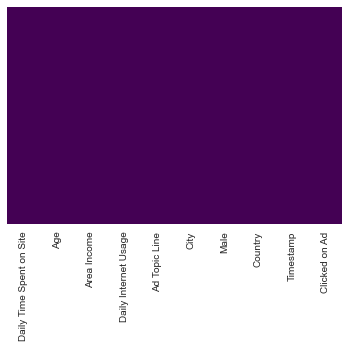

In [9]:
sns.heatmap(data = adv.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

* Sem dados faltantes.

In [10]:
adv.duplicated().value_counts()

False    1000
dtype: int64

* Sem dados duplicados.

# 3) Análise Exploratória dos Dados

## 3.1) Variáveis Numéricas

### 3.1.1) Daily Time Spent on Site vs Clicked on Ad

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

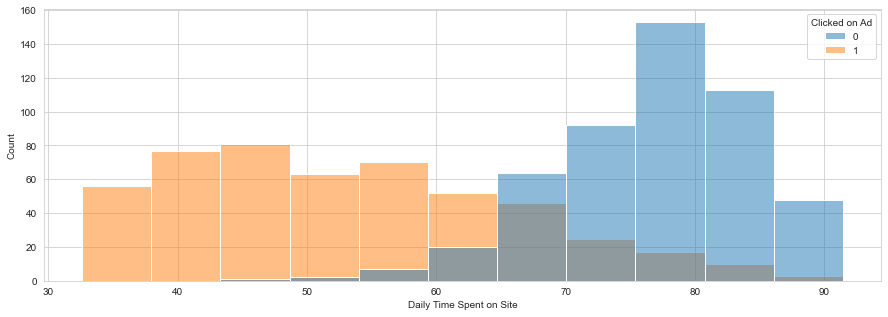

In [11]:
plt.figure(figsize=(15,5))
sns.histplot(data = adv, x = 'Daily Time Spent on Site', hue = 'Clicked on Ad')

In [12]:
adv['Daily Time Spent on Site'].corr(adv['Clicked on Ad'])

-0.748116564119635

* Dados indicam forte correlação negativa entre Tempo de Permanência no Site e Clicou no Anúncio.

* Em outras palavras, quanto maior o Tempo de Permanência no Site, menor a chance de ter clicado no anúncio.

### 3.1.2) Age vs Clicked on Ad

<AxesSubplot:xlabel='Age', ylabel='Count'>

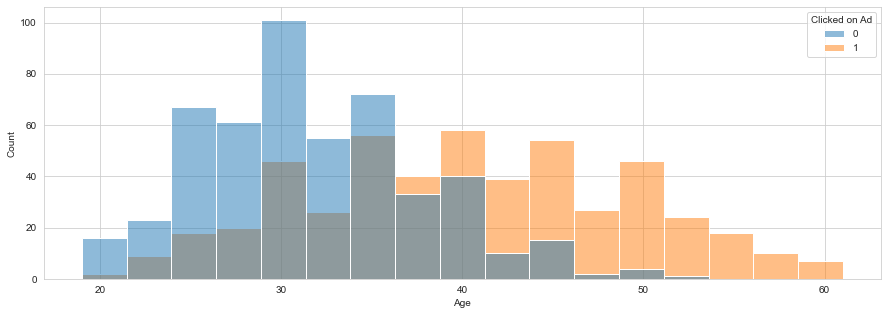

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(data = adv, x = 'Age', hue = 'Clicked on Ad')

In [14]:
adv['Age'].corr(adv['Clicked on Ad'])

0.4925312655560384

* Dados indicam correlação positiva moderada entre Idade e Clicou no Anúncio.

* Em outras palavras, quanto maior a Idade, maior a chance de ter clicado no anúncio.

### 3.1.3) Area Income vs Clicked on Ad

<AxesSubplot:xlabel='Area Income', ylabel='Count'>

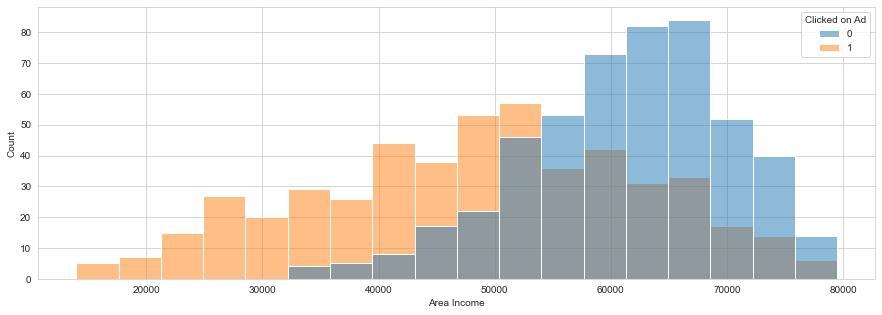

In [15]:
plt.figure(figsize=(15,5))
sns.histplot(data = adv, x = 'Area Income', hue = 'Clicked on Ad')

In [16]:
adv['Area Income'].corr(adv['Clicked on Ad'])

-0.4762546275321449

* Dados indicam correlação negativa moderada entre Renda Média da Região e Clicou no Anúncio.

* Em outras palavras, quanto maior a Renda Média da Região, menor a chance de ter clicado no anúncio.

### 3.1.4) Daily Internet Usage vs Clicked on Ad

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Count'>

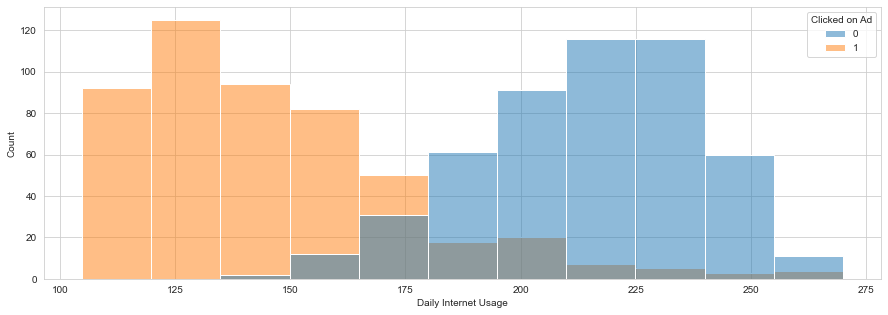

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(data = adv, x = 'Daily Internet Usage', hue = 'Clicked on Ad')

In [18]:
adv['Daily Internet Usage'].corr(adv['Clicked on Ad'])

-0.7865391758714905

* Dados indicam forte correlação negativa entre Tempo de Uso Diário de Internet e Clicou no Anúncio.

* Em outras palavras, quanto maior o Tempo de Uso Diário de Internet, menor a chance de ter clicado no anúncio.

### 3.1.5) Male vs Clicked on Ad

<AxesSubplot:xlabel='Male', ylabel='count'>

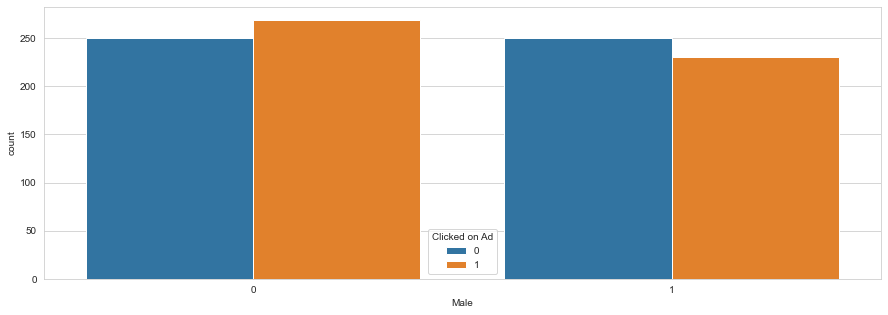

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data = adv, x = 'Male', hue = 'Clicked on Ad')

In [20]:
adv['Male'].corr(adv['Clicked on Ad'])

-0.03802746574898798

* Dados indicam correlaçao irrelevante entre Gênero e Clicou no Anúncio.

* Em outras palavras, saber o Gênero do consumidor não é um bom preditor de ter clicado no anúncio ou não.

## 3.2) Categorical Variables

### 3.2.1) Ad Topic Line

In [21]:
adv['Ad Topic Line'].value_counts()

Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64

* Os dados brutos não apresentam valor para o modelo.

* Feature engineering para descobrir palavras frequentes pode ser um caminho para extrair valor destes dados.

### 3.2.2) City

In [22]:
adv['City'].value_counts()

Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64

* Os dados brutos não apresentam valor para o modelo.

* Feature engineering para agrupar cidades em regiões pode ser um caminho para extrair valor destes dados.

### 3.2.3) Country

In [23]:
adv['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

* Os dados brutos não apresentam valor para o modelo.

* Feature engineering para agrupar países em continentes pode ser um caminho para extrair valor destes dados.

### 3.2.4) Timestamp

In [24]:
adv['Timestamp'].value_counts()

2016-03-27 00:53:11    1
2016-01-07 23:02:43    1
2016-04-05 08:18:45    1
2016-04-17 18:38:14    1
2016-02-03 16:54:33    1
                      ..
2016-03-13 13:50:25    1
2016-07-16 14:13:54    1
2016-04-18 00:49:33    1
2016-07-17 01:13:56    1
2016-06-03 21:43:21    1
Name: Timestamp, Length: 1000, dtype: int64

* Os dados brutos não apresentam valor para o modelo.

* Feature engineering para descobrir períodos do dia, dias da semana, pode ser um caminho para extrair valor destes dados.

## 3.3) Matriz de Correlação Entre Variáveis

<AxesSubplot:>

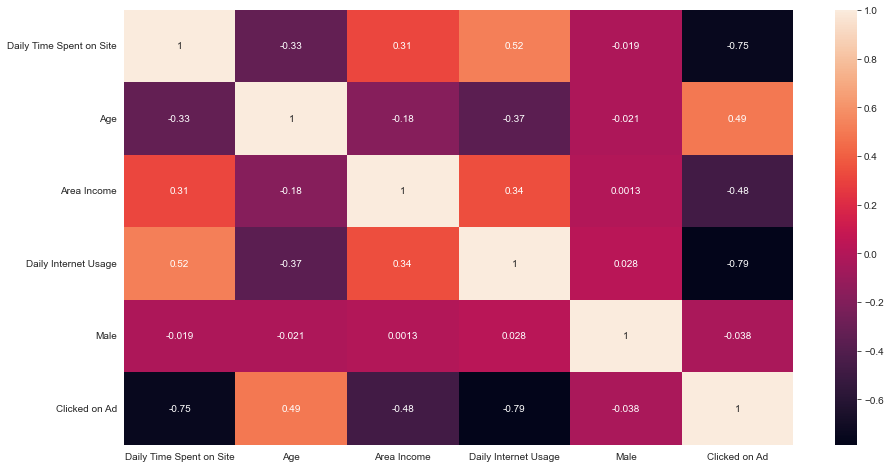

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(data = adv.corr(), annot = True)

Tier List Correlações com Variável Resposta "Clicked on Ad":
* 1) Daily Internet Usage: -0.79
* 2) Daily Time Spent on Site: -0.75
* 3) Age: 0.49
* 4) Area Income: -0.48
* 5) Male: -0.038

# 4) Criando o Modelo

## 4.1) Normalização dos Dados

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(adv[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']])

StandardScaler()

In [29]:
scaled_features = scaler.transform(adv[['Daily Time Spent on Site', 'Age', 'Area Income',
                                        'Daily Internet Usage', 'Male']])

In [30]:
adv_feat = pd.DataFrame(data = scaled_features, columns = [['Daily Time Spent on Site', 'Age', 'Area Income',
                                        'Daily Internet Usage', 'Male']])

In [31]:
adv_feat.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


## 4.2) Separação de Dados de Treino e Teste

In [32]:
X = adv_feat
y = adv['Clicked on Ad']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 4.3) Treinando o Modelo

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

C:\Users\breno\anaconda3\envs\dsdegree\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

## 4.4) Predições do Modelo

In [38]:
pred = model.predict(X_test)

C:\Users\breno\anaconda3\envs\dsdegree\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


## 4.5) Avaliando o Modelo

### 4.5.1) Test Size = 0.2

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[105   0]
 [  4  91]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       105
           1       1.00      0.96      0.98        95

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



### Curva ROC

In [41]:
from sklearn.metrics import roc_curve

In [42]:
from sklearn.metrics import roc_auc_score

ROC AUC : 0.9789


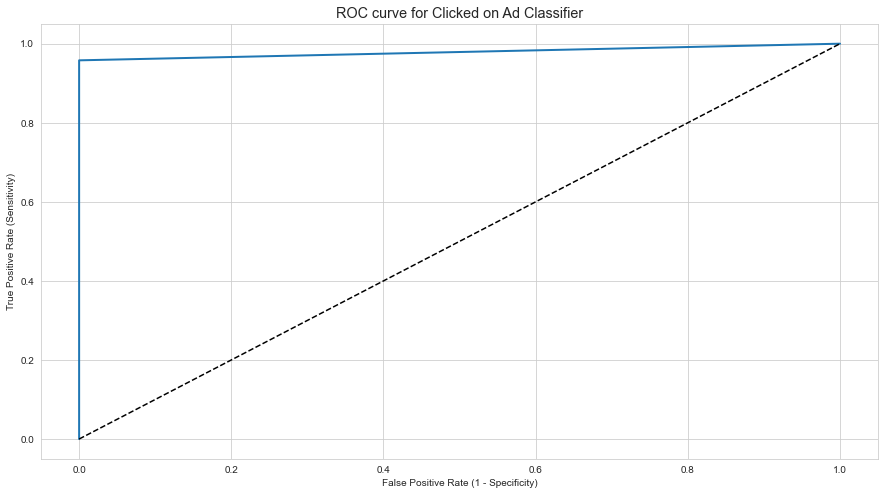

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label = True)

plt.figure(figsize=(15,8))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Clicked on Ad Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

ROC_AUC = roc_auc_score(y_test, pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

### 4.5.2) Test Size = 0.3

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[155   2]
 [  5 138]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



C:\Users\breno\anaconda3\envs\dsdegree\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\breno\anaconda3\envs\dsdegree\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


### Curva ROC

ROC AUC : 0.9761


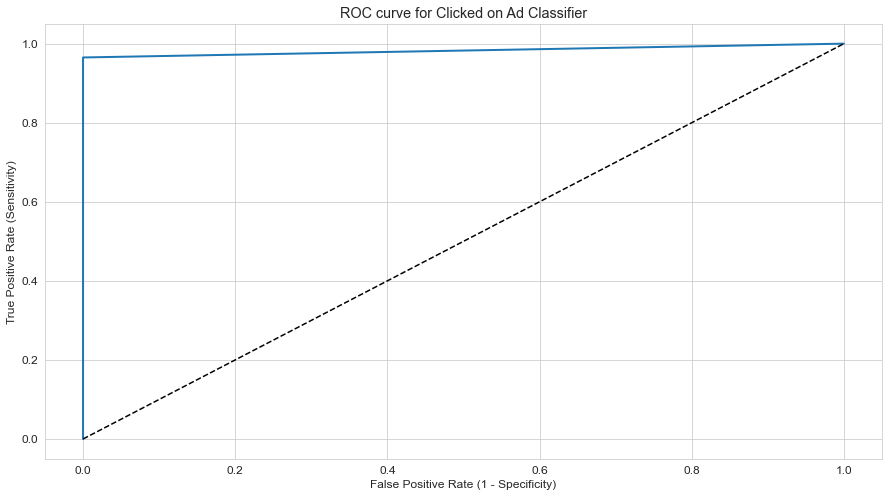

In [46]:
Rfpr, tpr, thresholds = roc_curve(y_test, pred, pos_label = True)

plt.figure(figsize=(15,8))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Clicked on Ad Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

ROC_AUC = roc_auc_score(y_test, pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

## 5) Conclusões💯
* Os resultados __indicam__ que o __Modelo de Regressão Logística__ é um __excelente__ preditor se um consumidor clicaria ou não em um anúncio da empresa.


* Os resultados __também__ indicam as seguintes relações:  
  
  1) Quanto __maior__ o Tempo Diário de Uso de Internet, __menor__ a chance de clicar no anúncio.  
  2) Quanto __maior__ o Tempo de Permanência no Site, __menor__ a chance de clicar no anúncio.  
  3) Quanto __maior__ a Renda da Região, __menor__ a chance de clicar no anúncio.  
  4) Quanto__maior__ a Idade, __maior__ a chance de clicar no anúncio.  
  5) __Gênero__ não se mostrou um bom preditor de clicar no anúncio ou não. 


* Se o __objetivo da empresa__ for atingir __adultos__, de __regiões de baixa renda__ e __independete do gênero__ dos consumidores, o anúncio __performou bem__.


* __No entanto__, se o objetivo da empresa for atingir qualquer um dos grupos abaixo, individualmente ou combinados entre si:

  1) Especificamente __consumidores jovens__  
  2) Especificamente __homens__  
  3) Especificamente __mulheres__  
  4) Especificamente __consumidores de regiões de alta renda__


* O anúncio __não demonstra__ converter os consumidores com as __características desejadas__.